In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
import torch
import torch.nn as nn

In [70]:
def ann_model(x, y):
    ann_reg = nn.Sequential(
        nn.Linear(1, 1),
        nn.ReLU(),
        nn.Linear(1, 1)
    )
    lossfun = nn.MSELoss()
    lr = 0.05
    numepochs = 100
    losses = torch.zeros(numepochs)
    optimizer = torch.optim.SGD(ann_reg.parameters(), lr=lr)

    for epochi in range(numepochs):
        yHat = ann_reg(x)

        loss = lossfun(yHat, y)
        losses[epochi] = loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    predictions = ann_reg(x)
    return predictions, losses


def createData(m):
    N = 50
    x = torch.randn(N, 1)
    y = m * x + torch.randn(N, 1) / 2
    return x, y

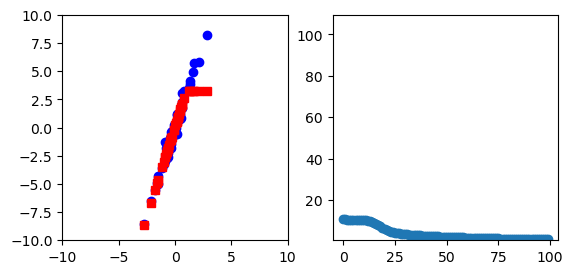

In [77]:
x, y = createData(3)
yHat, losses = ann_model(x, y)

plt.subplot(1, 2, 1)
plt.plot(x, y, 'bo')
plt.plot(x, yHat.detach(), 'rs')
plt.axis('square')
plt.axis([-10, 10, -10, 10])

plt.subplot(1, 2, 2)
plt.plot(losses.detach(), 'o',linewidth = 0.1)
plt.axis('square')

plt.show()